### Synthetic population transformation
This notebook contains script for transformation synthetic population into networkx graph

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import networkx as nx
import tqdm 
import geopandas as gpd
from shapely.geometry import Polygon, MultiPolygon, Point
import contextily as cx
from pyproj import Transformer

### Check for size of Graph and RAM limitations

In [2]:
N = 15
mean_contact_number = 40
G = nx.Graph()
for u in tqdm.tqdm(range(N)):
    for _ in range(mean_contact_number):
        v = random.randint(1, N)
        if v != u:
            G.add_edge(u, v) 
nx.write_graphml(G, "test_graph.xml")

100%|██████████| 1500000/1500000 [03:57<00:00, 6313.80it/s]


In [3]:
H = nx.read_graphml("test_graph.xml")

### Synthetic population statistics

In [2]:
full_city = pd.read_csv('./data/chelyabinsk/people.txt', sep = '\t', index_col = 0)
# sampled_city = full_city
sampled_city = pd.read_csv('./data/chelyabinsk_75/people.txt', sep = '\t', index_col = 0)

In [3]:
len(full_city['sp_hh_id'].unique())

435933

In [4]:
len(sampled_city['sp_hh_id'].unique())

402690

In [7]:
vertice_id = np.arange(len(sampled_city['sp_id'].unique()))

In [8]:
sampled_city['vertice_id'] = vertice_id

In [9]:
adults = sampled_city[sampled_city['age'] > 17]
children = sampled_city[sampled_city['age'] <= 17]
assert (len(adults) + len(children)) == len(sampled_city)

In [10]:
len(adults['work_id'].unique())

74906

In [11]:
len(children['work_id'].unique())

114

In [12]:
sampled_city

,sp_id,sp_hh_id,age,sex,work_id,vertice_id
0,599955,1,8,F,48,0
1,293648,1,39,M,1,1
2,556704,1,2,F,X,2
3,293647,2,39,M,1,3
4,1094293,2,69,F,X,4
...,...,...,...,...,...,...
1189518,705204,471999,23,F,74931,1144687
1189519,970289,471999,54,F,74931,1144688
1189520,462547,471999,61,M,X,1144689
1189523,888930,472002,44,F,74931,1144690


In [13]:
possible_work_id = sampled_city['work_id'].unique()

In [14]:
# Create an empty graph
G = nx.Graph()

# Add nodes for each unique vertice_id
# G.add_nodes_from(sampled_city['vertice_id'].unique())

for work_id in tqdm.tqdm(sampled_city['work_id'].unique()):
    
    # print("Current work_id is:", work_id)
    if work_id != 'X':
        work_df = sampled_city[sampled_city['work_id'] == work_id]
        
        # Connect nodes whose age is less than or equal to 17
        young_df = work_df[work_df['age'] <= 17]
        # print('Children processing...')
        if not young_df.empty:
            young_vertices = young_df['vertice_id'].tolist()
            # print('Young vertices have been read:', len(young_vertices))
            for i in range(len(young_vertices)):
                for j in range(i + 1, len(young_vertices)):
                    G.add_edge(int(young_vertices[i]), int(young_vertices[j]))
        
        # print('Adult processing...')
        # Connect nodes whose age is more than 17
        old_df = work_df[work_df['age'] > 17]
        if not old_df.empty:
            old_vertices = old_df['vertice_id'].tolist()
            for i in range(len(old_vertices)):
                for j in range(i + 1, len(old_vertices)):
                    G.add_edge(int(old_vertices[i]), int(old_vertices[j]))

for hh_id in tqdm.tqdm(sampled_city['sp_hh_id'].unique()):
    group_df = sampled_city[sampled_city['sp_hh_id'] == hh_id]
    vertices = group_df['vertice_id'].tolist()
    for i in range(len(vertices)):
        for j in range(i + 1, len(vertices)):
            G.add_edge(int(vertices[i]), int(vertices[j]))

nx.write_graphml(G, "chelyabinsk_sampled_75_percent.xml")

 10%|█         | 40681/402690 [01:16<10:52, 554.82it/s] 

In [23]:
list(G.nodes)

[0,
 9,
 46,
 83,
 141,
 151,
 167,
 221,
 227,
 229,
 244,
 253,
 283,
 293,
 302,
 315,
 324,
 327,
 356,
 380,
 421,
 444,
 453,
 457,
 469,
 484,
 518,
 528,
 532,
 549,
 612,
 626,
 628,
 635,
 681,
 698,
 702,
 703,
 723,
 726,
 772,
 784,
 902,
 903,
 905,
 920,
 931,
 935,
 938,
 942,
 988,
 991,
 1030,
 1045,
 1048,
 1092,
 1129,
 1131,
 1158,
 1168,
 1176,
 1190,
 1196,
 1198,
 1212,
 1214,
 1228,
 1284,
 1322,
 1345,
 1409,
 1424,
 1478,
 1496,
 1502,
 1504,
 1540,
 1549,
 1551,
 1631,
 1648,
 1688,
 1701,
 1702,
 1739,
 1764,
 1776,
 1819,
 1823,
 1824,
 1862,
 1869,
 1880,
 1885,
 1909,
 1940,
 2003,
 2008,
 2016,
 2040,
 2048,
 2094,
 2125,
 2151,
 2152,
 2168,
 2221,
 2224,
 2229,
 2235,
 2239,
 2241,
 2279,
 2282,
 2284,
 2324,
 2391,
 2463,
 2468,
 2517,
 2535,
 2552,
 2553,
 2594,
 2617,
 2678,
 2690,
 2735,
 2748,
 2755,
 2791,
 2797,
 2801,
 2829,
 2854,
 2863,
 2888,
 2890,
 2897,
 3031,
 3038,
 3056,
 3060,
 3071,
 3114,
 3247,
 3365,
 3382,
 3428,
 3492,
 3493,
 

In [7]:
ticks_size = 16
label_size = 20

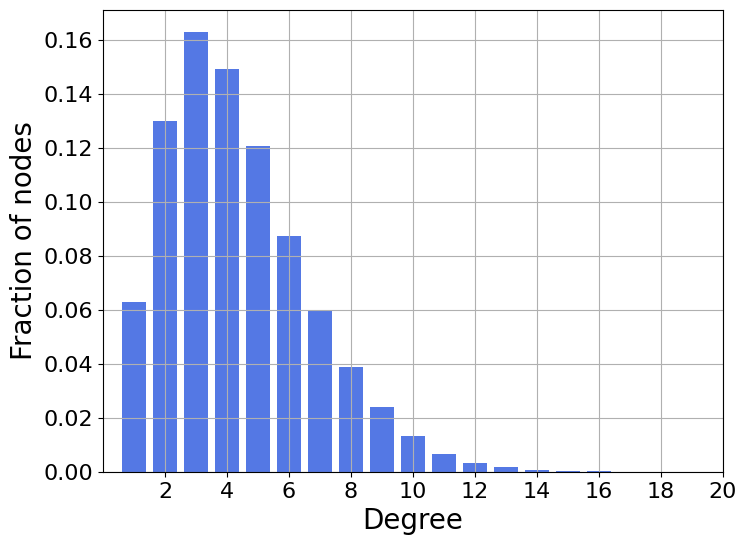

In [52]:
def plot_degree_distribution(G):
    
    # precalculations
    degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
    unique_degrees, counts = np.unique(degree_sequence, return_counts=True)
    fractions = counts / len(degree_sequence)

    # plotting
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.bar(unique_degrees, fractions, color='RoyalBlue', alpha=0.9)
    ax.set_xlim([0, 20])
    ax.set_xlabel("Degree", fontsize=label_size)
    ax.set_ylabel("Fraction of nodes", fontsize=label_size)
    ax.set_xticks([2,4,6,8,10,12,14,16,18,20])
    ax.tick_params(axis='both', which='major', labelsize=ticks_size)
    ax.grid(zorder=-1)
    fig.savefig('./figures/network_degree_dist.png', dpi=600, bbox_inches='tight')
    fig.savefig('./figures/network_degree_dist.pdf', bbox_inches='tight')
    return 

plot_degree_distribution(G)

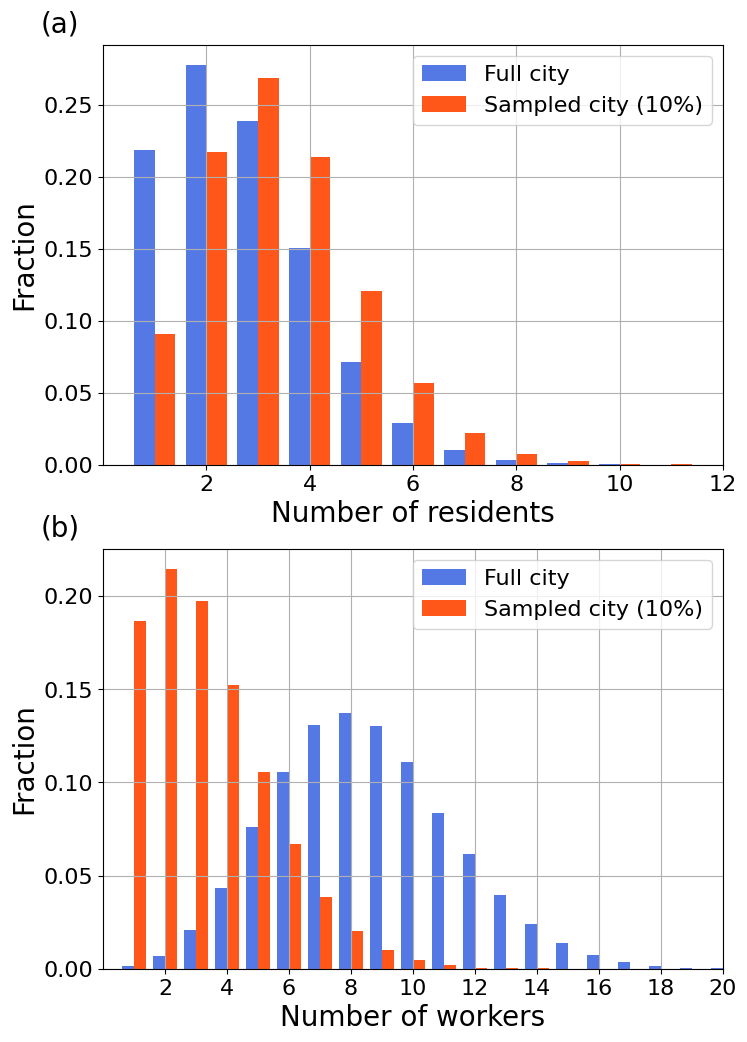

In [28]:
def plot_synth_pop_degree_distribution():
    # precalculations
    full_people = pd.read_csv('./data/chelyabinsk/people.txt', sep = "\t", index_col=0)
    workersNumber = list(full_people[(full_people.work_id!='X')&(full_people.age>17)].groupby('work_id').size())
    workplaceByWorker = []
    for i in set(workersNumber):
        workplaceByWorker.append([i, workersNumber.count(i)])

    residentsNumder = list(full_people.groupby('sp_hh_id').size())
    householdByResident = []
    for i in set(residentsNumder):
        householdByResident.append([i, residentsNumder.count(i)])
    
    all_households = sum([i[1] for i in householdByResident])
    all_workplaces = sum([i[1] for i in workplaceByWorker])

    sampled_people = pd.read_csv('./data/chelyabinsk_10/people.txt', sep = "\t", index_col=0)
    workersNumber_sampled = list(sampled_people[(sampled_people.work_id!='X')&(sampled_people.age>17)].groupby('work_id').size())
    workplaceByWorker_sampled = []
    for i in set(workersNumber_sampled):
            workplaceByWorker_sampled.append([i, workersNumber_sampled.count(i)])

    residentsNumder_sampled = list(sampled_people.groupby('sp_hh_id').size())
    householdByResident_sampled = []
    for i in set(residentsNumder_sampled):
        householdByResident_sampled.append([i, residentsNumder_sampled.count(i)])
    
    all_households_sampled = sum([i[1] for i in householdByResident_sampled])
    all_workplaces_sampled = sum([i[1] for i in workplaceByWorker_sampled])


    # plotting
    fig, ax = plt.subplots(2, 1, figsize=(8, 12))
    bar_width = 0.4
    ax[0].bar([i[0] - bar_width/2 for i in householdByResident] , 
              [i[1]/all_households for i in householdByResident], 
              color='RoyalBlue', alpha=0.9, width=bar_width, label='Full city')
    ax[0].bar([i[0] + bar_width/2 for i in householdByResident_sampled] , 
              [i[1]/all_households_sampled for i in householdByResident_sampled], 
              color='Orangered', alpha=0.9, width=bar_width, label='Sampled city (10%)')
    
    ax[0].set_xlim([0, 12])
    ax[0].set_xlabel("Number of residents", fontsize=label_size)
    ax[0].set_ylabel("Fraction", fontsize=label_size)
    ax[0].set_xticks([2,4,6,8,10,12])
    ax[0].tick_params(axis='both', which='major', labelsize=ticks_size)
    ax[0].grid()
    ax[0].text(-0.1, 1.05, "(a)", transform=ax[0].transAxes, fontsize=label_size, va='center')
    ax[0].legend(fontsize=ticks_size)
    
    
    
    ax[1].bar([i[0] - bar_width/2 for i in workplaceByWorker], 
              [i[1]/all_workplaces for i in workplaceByWorker], 
              color='RoyalBlue', alpha=0.9, width=bar_width, label='Full city')
    ax[1].bar([i[0] + bar_width/2 for i in workplaceByWorker_sampled], 
              [i[1]/all_workplaces_sampled for i in workplaceByWorker_sampled], 
              color='OrangeRed', alpha=0.9, width=bar_width, label='Sampled city (10%)')
    ax[1].set_xlim([0, 20])
    ax[1].set_xlabel("Number of workers", fontsize=label_size)
    ax[1].set_ylabel("Fraction", fontsize=label_size)
    ax[1].set_xticks([2,4,6,8,10,12,14,16,18,20])
    ax[1].tick_params(axis='both', which='major', labelsize=ticks_size)
    ax[1].text(-0.1, 1.05, "(b)", transform=ax[1].transAxes, fontsize=label_size, va='center')
    ax[1].grid()
    ax[1].legend(fontsize=ticks_size)

    fig.savefig('./figures/synth_population_degree_dist.png', dpi=600, bbox_inches='tight')
    fig.savefig('./figures/synth_population_degree_dist.pdf', bbox_inches='tight')

plot_synth_pop_degree_distribution()

In [2]:
city_name = 'chelyabinsk'

people = pd.read_csv('./data/' + city_name + '/people_' + city_name + '_2023_final.txt', sep='\t')
households = pd.read_csv('./data/' + city_name + '/households_' + city_name + '_2023_final.txt', sep='\t')
geo_df = gpd.read_file('./data/' + city_name + '/MO_' + city_name + '.geojson')
schools = pd.read_csv('./data/' + city_name + '/schools_' + city_name + '_2023.txt', sep='\t')
workplaces = pd.read_csv('./data/' + city_name + '/workplaces_' + city_name + '_splitted.txt', sep='\t')

C:\Users\AKorzin\AppData\Local\Temp\2\ipykernel_6396\2935247167.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


(54.9, 55.35)

c:\AKorzin\ICCS_2025\.env\Lib\site-packages\IPython\core\events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
c:\AKorzin\ICCS_2025\.env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


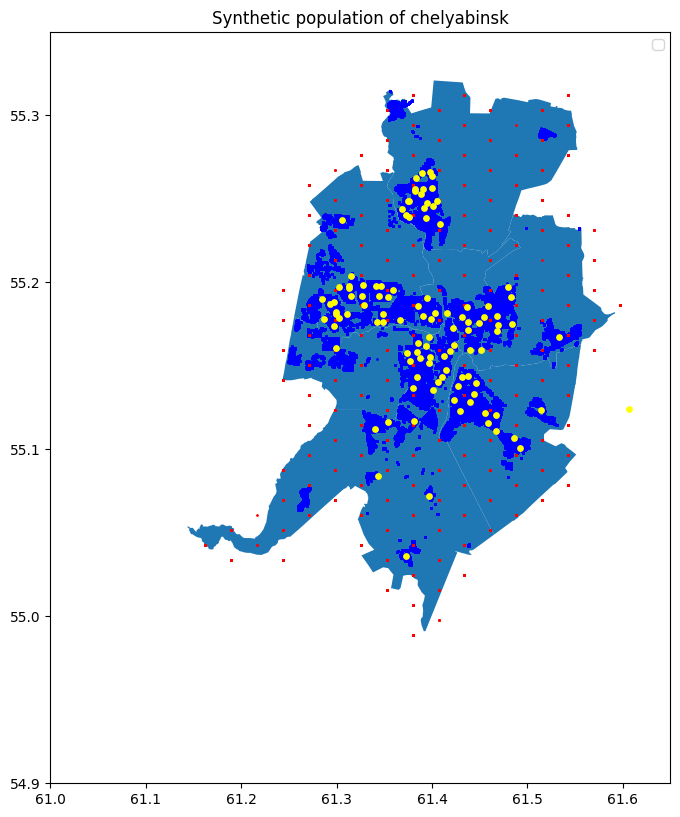

In [95]:
fig, ax = plt.subplots(figsize=(8, 16))
ax.set_title('Synthetic population of {}'.format(city_name))
geo_df.plot(ax=ax)
ax.scatter(households['longitude'], households['latitude'], s=1, color='b')
ax.scatter(workplaces['longitude'], workplaces['latitude'], s=1, color='r')
ax.scatter(schools['longitude'], schools['latitude'], s=15, color='yellow')
ax.set_xlim([61, 61.65])
ax.set_ylim([54.9, 55.35])

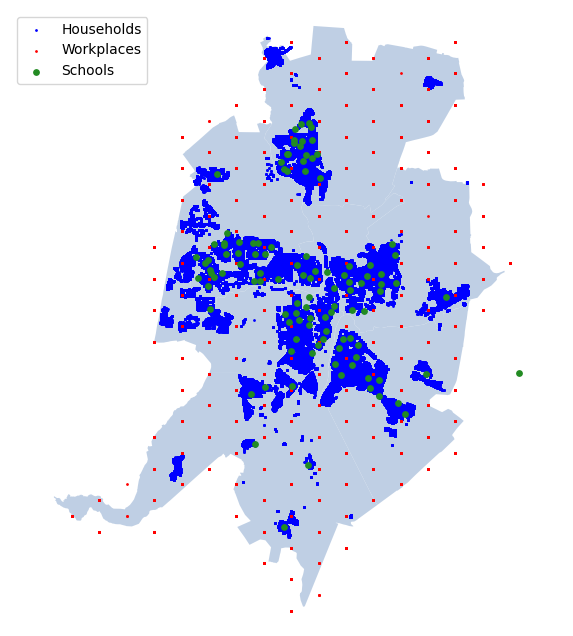

In [5]:
import contextily as cx
import matplotlib.pyplot as plt
import geopandas as gpd

# Assuming geo_df, households, workplaces, and schools are already defined

# Convert the data to EPSG:3857 (Web Mercator) projection
geo_df = geo_df.to_crs(epsg=3857)
households = gpd.GeoDataFrame(households, geometry=gpd.points_from_xy(households.longitude, households.latitude), crs="EPSG:4326").to_crs(epsg=3857)
workplaces = gpd.GeoDataFrame(workplaces, geometry=gpd.points_from_xy(workplaces.longitude, workplaces.latitude), crs="EPSG:4326").to_crs(epsg=3857)
schools = gpd.GeoDataFrame(schools, geometry=gpd.points_from_xy(schools.longitude, schools.latitude), crs="EPSG:4326").to_crs(epsg=3857)

fig, ax = plt.subplots(figsize=(8, 8))
# ax.set_title('Synthetic population of {}'.format(city_name))

geo_df.plot(ax=ax, color='lightsteelblue', alpha=0.8)
ax.scatter(households.geometry.x, households.geometry.y, s=1, color='blue', label='Households')
ax.scatter(workplaces.geometry.x, workplaces.geometry.y, s=1, color='red', label='Workplaces')
ax.scatter(schools.geometry.x, schools.geometry.y, s=15, color='forestgreen', label='Schools')

# Add the basemap
# cx.add_basemap(ax, source=cx.providers.Esri.WorldImagery)
transformer = Transformer.from_crs("EPSG:4326", "EPSG:3857", always_xy=True)
x_min, y_min = transformer.transform(61.1, 54.98)
x_max, y_max = transformer.transform(61.65, 55.33)

ax.set_xlim([x_min, x_max])
ax.set_ylim([y_min, y_max])

# Remove axis labels
ax.legend(loc='upper left')
ax.set_axis_off()
fig.savefig('./figures/map.png', dpi=600, bbox_inches='tight')
fig.savefig('./figures/map.pdf', bbox_inches='tight')